# TRANSFORMER WITH EXERNAL SYLLAB DATASET

In [1]:
# utils import

import syllabification as syll
import copy
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt

## Dataset exploitation

In [2]:
with open('inferno_syllnew.txt','r') as f:
  inferno = f.read()

print(inferno[:231])
print('\n\n[...]\n\n')
print(inferno[-266:])

Inferno • Canto I


  1 |Nel |mez|zo |del |cam|min |di |no|stra |vi|ta             
  2 |mi |ri|tro|vai |per |u|na |sel|va o|scu|ra,               
  3 |ché |la |di|rit|ta |via |e|ra |smar|ri|ta.                

  4 |Ahi |quan|to 


[...]


      

136 |sa|lim|mo |sù, |el |pri|mo e |io |se|con|do,              
137 |tan|to |ch’ i’ |vi|di |de |le |co|se |bel|le              
138 |che |por|ta ’l |ciel, |per |un |per|tu|gio |ton|do.       

139 |E |quin|di u|scim|mo a |ri|ve|der |le |stel|le.           




In [3]:
with open('purgatorio_syllnew.txt','r') as f:
  purgatorio = f.read()

print(purgatorio[:231])
print('\n\n[...]\n\n')
print(purgatorio[-266:])


Purgatorio • Canto I


  1 |Per |cor|rer |mi|glior |ac|que al|za |le |ve|le           
  2 |o|mai |la |na|vi|cel|la |del |mio in|ge|gno,              
  3 |che |la|scia |die|tro a |sé |mar |sì |cru|de|le;          

  4 |e |can|te


[...]


      

142 |Io |ri|tor|nai |da |la |san|tis|si|ma on|da               
143 |ri|fat|to |sì |co|me |pian|te |no|vel|le                  
144 |ri|no|vel|la|te |di |no|vel|la |fron|da,                  

145 |pu|ro e |di|spo|sto a |sa|li|re a |le |stel|le.           




In [4]:
with open('paradiso_syllnew.txt','r') as f:
  paradiso = f.read()

print(paradiso[:231])
print('\n\n[...]\n\n')
print(paradiso[-266:])

Paradiso • Canto I


  1 |La |glo|ria |di |co|lui |che |tut|to |mo|ve               
  2 |per |l’ u|ni|ver|so |pe|ne|tra, e |ri|splen|de            
  3 |in |u|na |par|te |più |e |me|no al|tro|ve.                

  4 |Nel |ciel |c


[...]


     

142 |A |l’ al|ta |fan|ta|sia |qui |man|cò |pos|sa;             
143 |ma |già |vol|ge|va il |mio |di|sio |e ’l |vel|le,         
144 |sì |co|me |ro|ta |ch’ i|gual|men|te è |mos|sa,            

145 |l’ a|mor |che |mo|ve il |so|le e |l’ al|tre |stel|le.     





In [5]:
# Merge all input together
divine_comedy = inferno + purgatorio + paradiso

In [6]:
print(divine_comedy[:231])
print('\n\n[...]\n\n')
print(divine_comedy[-266:])

Inferno • Canto I


  1 |Nel |mez|zo |del |cam|min |di |no|stra |vi|ta             
  2 |mi |ri|tro|vai |per |u|na |sel|va o|scu|ra,               
  3 |ché |la |di|rit|ta |via |e|ra |smar|ri|ta.                

  4 |Ahi |quan|to 


[...]


     

142 |A |l’ al|ta |fan|ta|sia |qui |man|cò |pos|sa;             
143 |ma |già |vol|ge|va il |mio |di|sio |e ’l |vel|le,         
144 |sì |co|me |ro|ta |ch’ i|gual|men|te è |mos|sa,            

145 |l’ a|mor |che |mo|ve il |so|le e |l’ al|tre |stel|le.     





In [7]:
import re

divine_comedy = divine_comedy.replace("ä", "a")
divine_comedy = divine_comedy.replace("é", "è")
divine_comedy = divine_comedy.replace("ë", "è")
divine_comedy = divine_comedy.replace("Ë", "E")
divine_comedy = divine_comedy.replace("ï", "i")
divine_comedy = divine_comedy.replace("Ï", "I")
divine_comedy = divine_comedy.replace("ó", "ò")
divine_comedy = divine_comedy.replace("ö", "o")
divine_comedy = divine_comedy.replace("ü", "u")
divine_comedy = divine_comedy.replace("(", "-")
divine_comedy = divine_comedy.replace(")", "-")
divine_comedy = divine_comedy.replace("[", "")
divine_comedy = divine_comedy.replace("]", "")
divine_comedy = re.sub(r'[0-9]+', '', divine_comedy)

In [8]:
divine_comedy = re.sub('\n\n\n','\n\n',divine_comedy)

divine_comedy = syll._strip_punctuaction(divine_comedy.lower())
divine_comedy_lines = divine_comedy.split('\n')

print("divine_comedy_lines:")
print(divine_comedy_lines[0:10])
print()

#Generate the dataset of lines
lines_dataset = []
for el in divine_comedy_lines:
    el = el.strip()
    el = el.split('|')[1:]
    if el != []:
       lines_dataset.append(el)
    else:
       lines_dataset.append(['=end_terzine='])

print("lines_dataset:")
print(lines_dataset[:10])

divine_comedy_lines:
['inferno • canto i', '', '   |nel |mez|zo |del |cam|min |di |no|stra |vi|ta             ', '   |mi |ri|tro|vai |per |u|na |sel|va o|scu|ra               ', '   |chè |la |di|rit|ta |via |e|ra |smar|ri|ta                ', '', '   |ahi |quan|to a |dir |qual |e|ra è |co|sa |du|ra           ', '   |e|sta |sel|va |sel|vag|gia e |a|spra e |for|te            ', '   |che |nel |pen|sier |ri|no|va |la |pa|u|ra                ', '']

lines_dataset:
[['=end_terzine='], ['=end_terzine='], ['nel ', 'mez', 'zo ', 'del ', 'cam', 'min ', 'di ', 'no', 'stra ', 'vi', 'ta'], ['mi ', 'ri', 'tro', 'vai ', 'per ', 'u', 'na ', 'sel', 'va o', 'scu', 'ra'], ['chè ', 'la ', 'di', 'rit', 'ta ', 'via ', 'e', 'ra ', 'smar', 'ri', 'ta'], ['=end_terzine='], ['ahi ', 'quan', 'to a ', 'dir ', 'qual ', 'e', 'ra è ', 'co', 'sa ', 'du', 'ra'], ['e', 'sta ', 'sel', 'va ', 'sel', 'vag', 'gia e ', 'a', 'spra e ', 'for', 'te'], ['che ', 'nel ', 'pen', 'sier ', 'ri', 'no', 'va ', 'la ', 'pa', 'u', 'ra'], 

In [9]:
# Remove extra spaces
lines_dataset = copy.deepcopy(lines_dataset)

def extract_spaces(list):
    test = []
    for el in list:
      if el[-1]==' ':
        test.append(str(el[:-1]))
        test.append(' ')
      else:
        test.append(el)
    return test

for i in range(len(lines_dataset)):
  lines_dataset[i] = extract_spaces(lines_dataset[i])

for i in range(10):
  print(lines_dataset[i])

['=end_terzine=']
['=end_terzine=']
['nel', ' ', 'mez', 'zo', ' ', 'del', ' ', 'cam', 'min', ' ', 'di', ' ', 'no', 'stra', ' ', 'vi', 'ta']
['mi', ' ', 'ri', 'tro', 'vai', ' ', 'per', ' ', 'u', 'na', ' ', 'sel', 'va o', 'scu', 'ra']
['chè', ' ', 'la', ' ', 'di', 'rit', 'ta', ' ', 'via', ' ', 'e', 'ra', ' ', 'smar', 'ri', 'ta']
['=end_terzine=']
['ahi', ' ', 'quan', 'to a', ' ', 'dir', ' ', 'qual', ' ', 'e', 'ra è', ' ', 'co', 'sa', ' ', 'du', 'ra']
['e', 'sta', ' ', 'sel', 'va', ' ', 'sel', 'vag', 'gia e', ' ', 'a', 'spra e', ' ', 'for', 'te']
['che', ' ', 'nel', ' ', 'pen', 'sier', ' ', 'ri', 'no', 'va', ' ', 'la', ' ', 'pa', 'u', 'ra']
['=end_terzine=']


In [10]:
#Add placeholders
syllab_dataset = []
flag = 0

lines_dataset.reverse()

for el in lines_dataset:
  if flag == 0:
    syllab_dataset.append(el)
    if el == ['=end_terzine=']:
      flag = 1

  elif flag == 1:
    if el == ['=end_terzine=']:
      flag = 2
    else:
      flag = 0
      syllab_dataset.append(el)

  elif flag == 2: 
     if el == ['=end_terzine=']:
       flag = 2
     else:
       flag = 4

  elif flag == 4:
     flag = 0  

lines_dataset.reverse()
syllab_dataset.reverse()

In [11]:
syllab_dataset = copy.deepcopy(syllab_dataset)

for i in range(len(syllab_dataset)):
  if len(syllab_dataset[i]) > 1:
    syllab_dataset[i].insert(0, '-start-')
    syllab_dataset[i].append('-end-')

for i in range(10):
  print(syllab_dataset[i])

one_list_data = [item for sublist in syllab_dataset for item in sublist]
one_list_tokenized = [item for sublist in syllab_dataset for item in sublist]

['=end_terzine=']
['-start-', 'nel', ' ', 'mez', 'zo', ' ', 'del', ' ', 'cam', 'min', ' ', 'di', ' ', 'no', 'stra', ' ', 'vi', 'ta', '-end-']
['-start-', 'mi', ' ', 'ri', 'tro', 'vai', ' ', 'per', ' ', 'u', 'na', ' ', 'sel', 'va o', 'scu', 'ra', '-end-']
['-start-', 'chè', ' ', 'la', ' ', 'di', 'rit', 'ta', ' ', 'via', ' ', 'e', 'ra', ' ', 'smar', 'ri', 'ta', '-end-']
['=end_terzine=']
['-start-', 'ahi', ' ', 'quan', 'to a', ' ', 'dir', ' ', 'qual', ' ', 'e', 'ra è', ' ', 'co', 'sa', ' ', 'du', 'ra', '-end-']
['-start-', 'e', 'sta', ' ', 'sel', 'va', ' ', 'sel', 'vag', 'gia e', ' ', 'a', 'spra e', ' ', 'for', 'te', '-end-']
['-start-', 'che', ' ', 'nel', ' ', 'pen', 'sier', ' ', 'ri', 'no', 'va', ' ', 'la', ' ', 'pa', 'u', 'ra', '-end-']
['=end_terzine=']
['-start-', 'tan', 't è', ' ', 'a', 'ma', 'ra', ' ', 'che', ' ', 'po', 'co è', ' ', 'più', ' ', 'mor', 'te', '-end-']


In [12]:
syll_set = set([ item for elem in syllab_dataset for item in elem])
vocabulary_size = len(syll_set)
print('nr. of different syllabes: ',vocabulary_size)
print('syllabes set: ',syll_set)

syl2int = {el:pos for pos,el in enumerate(syll_set)}
print('syl2int: ',syl2int)

int2syl = {pos:el for pos,el in enumerate(syll_set)}
print('int2syl: ',int2syl)

nr. of different syllabes:  4099
syllabes set:  {'do', 'cia on', 'vec', 'cio', 'pì', 'ia an', 'tuon', 'vian', 'le ha', 'suf', 'n on', 'mo o', 're e', 'no e', 'den', 'pres', 'fiac', 'tro im', 'chel', 'glia es', 'sa im', 'de o', 'glo', 'nem', 'l è u', 'glio in', 'gliò', 'stig', 'tro il', 'gan', 'sta i', 'l an', 'gner', 'lo è in', 'piu', 'mèc', 'si n', 'tri', 'ghien', 'zia e', 'mi ad', 'no as', 'sup', 'na un', 'em', 'sto at', 'pra e', 'strat', 'm of', 'c han', 'se al', 'li au', 'sdet', 'ti ed', 'pre ac', 'fom', 'miei', 'giar', 'za al', 'può', 'rut', 'qua im', 'ed', 'ra of', 'v eb', 'stri', 'zio e l', 'bon', 'ch o', 'que or', 'stri av', 'n ha', 'cil', 'n om', 'fu ap', 'zia', 'sbar', 'chin', 'glia e', 'tre un', '‘la', 'pel', 'qua a', 'la of', 'de er', 'bra e l', 'cri', 'ria è l', 'bì', 'naut', 'dro o', 'stro uc', 'to e l', 'cad', 'stri an', 'rà', 'gio in', 'plu', 'o un', 'mor', 'spal', 'nien', 'gna as', 'git', 'sti in', 'tui', 'n io', 'gna e', 'za am', 'ghiaio', 'mia n', 'st es', 'chè a', '

In [13]:
with open('divine_comedy.txt','r', encoding='ISO-8859-1') as f:
#with open('inferno_syllnew.txt','r') as f:
  input_text = f.read()

print(input_text[:250])
print('\n\n[...]\n\n')
print(input_text[-280:])

INFERNO

- Canto I

Nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura,
ché la diritta via era smarrita.

Ahi quanto a dir qual era è cosa dura
esta selva selvaggia e aspra e forte
che nel pensier rinova la paura!

Tant' è amara che


[...]


vi s'indova;

ma non eran da ciò le proprie penne:
se non che la mia mente fu percossa
da un fulgore in che sua voglia venne.

A l'alta fantasia qui mancò possa;
ma già volgeva il mio disio e 'l velle,
sì come rota ch'igualmente è mossa,

l'amor che move il sole e l'altre stelle.


In [14]:
input_text = input_text.replace("ä", "a")
input_text = input_text.replace("é", "è")
input_text = input_text.replace("ë", "è")
input_text = input_text.replace("Ë", "E")
input_text = input_text.replace("ï", "i")
input_text = input_text.replace("Ï", "I")
input_text = input_text.replace("ó", "ò")
input_text = input_text.replace("ö", "o")
input_text = input_text.replace("ü", "u")
input_text = input_text.replace("(", "-")
input_text = input_text.replace(")", "-")
input_text = input_text.replace("[", "")
input_text = input_text.replace("]", "")
input_text = re.sub(r'[0-9]+', '', input_text)

In [15]:
input_text = re.sub(
  f'\n- Canto.*\n\n',
  '',
  input_text
)

for name in ['INFERNO', 'PURGATORIO', 'PARADISO']:
  input_text = re.sub(
    f'{name}',
    "",
    input_text
  )

In [16]:
input_text = re.sub('\n\n\n','\n\n',input_text)
input_text = syll._strip_punctuaction(input_text.lower())
input_text_lines = input_text.split('\n')

print("input_text_lines:")
print(input_text_lines[0:10])
print()

input_lines_dataset = []
for el in input_text_lines:
  if el != "":
    input_lines_dataset.append(el)
  else:
    input_lines_dataset.append('=end_terzine=')

print("input_lines_dataset:")
print(input_lines_dataset[0:10])

input_text_lines:
['', 'nel mezzo del cammin di nostra vita', 'mi ritrovai per una selva oscura', 'chè la diritta via era smarrita', '', 'ahi quanto a dir qual era è cosa dura', 'esta selva selvaggia e aspra e forte', 'che nel pensier rinova la paura', '', 'tant è amara che poco è più morte']

input_lines_dataset:
['=end_terzine=', 'nel mezzo del cammin di nostra vita', 'mi ritrovai per una selva oscura', 'chè la diritta via era smarrita', '=end_terzine=', 'ahi quanto a dir qual era è cosa dura', 'esta selva selvaggia e aspra e forte', 'che nel pensier rinova la paura', '=end_terzine=', 'tant è amara che poco è più morte']


In [17]:
import copy
input_data_full = copy.deepcopy(input_lines_dataset)
for i in range(len(input_lines_dataset)):
  if len(input_data_full[i]) > 1:
    input_data_full[i] = '-start-'+ input_data_full[i]
    input_data_full[i]= input_data_full[i] + '-end-'

for i in range(10):
  print(input_data_full[i])

one_list_data = [item for sublist in input_data_full for item in sublist]
one_list_tokenized = [item for sublist in input_data_full for item in sublist]

-start-=end_terzine=-end-
-start-nel mezzo del cammin di nostra vita-end-
-start-mi ritrovai per una selva oscura-end-
-start-chè la diritta via era smarrita-end-
-start-=end_terzine=-end-
-start-ahi quanto a dir qual era è cosa dura-end-
-start-esta selva selvaggia e aspra e forte-end-
-start-che nel pensier rinova la paura-end-
-start-=end_terzine=-end-
-start-tant è amara che poco è più morte-end-


## MODEL

In [18]:
seq_length = 3
step_length = 1
batch_size = 64
train_val_split = 0.7

tot_samples = int((len(input_data_full) - seq_length) / step_length)
train_samples = round(tot_samples * train_val_split)

print('Train Samples:', train_samples)
print('  Val Samples:', tot_samples - train_samples)

Train Samples: 13261
  Val Samples: 5683


In [19]:
from tensorflow.data import Dataset
from tensorflow.strings import reduce_join

def split_input_target(chunk):
  input_text = reduce_join(chunk[:-1], separator='\n') + '\n'
  target_text = reduce_join(chunk, separator='\n') + '\n'
  return input_text, target_text

dataset = Dataset.from_tensor_slices(input_data_full)
dataset = dataset.window(seq_length + 1, step_length, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(seq_length + 1))
dataset = dataset.map(split_input_target).shuffle(tot_samples, seed=0)

In [20]:
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.SubwordTextEncoder(
    vocab_list=syll_set
)
print(tokenizer.vocab_size, 'tokens:')
print()
for i, token in enumerate(tokenizer.subwords[:40]):
  print("'{}'".format('\\n' if token == '\n' else token))

4356 tokens:

'do'
'cia on'
'vec'
'cio'
'pì'
'ia an'
'tuon'
'vian'
'le ha'
'suf'
'n on'
'mo o'
're e'
'no e'
'den'
'pres'
'fiac'
'tro im'
'chel'
'glia es'
'sa im'
'de o'
'glo'
'nem'
'l è u'
'glio in'
'gliò'
'stig'
'tro il'
'gan'
'sta i'
'l an'
'gner'
'lo è in'
'piu'
'mèc'
'si n'
'tri'
'ghien'
'zia e'


In [21]:
def encode(input, target):
  input = [tokenizer.vocab_size] + tokenizer.encode(
      input.numpy()) + [tokenizer.vocab_size+1]

  target = [tokenizer.vocab_size] + tokenizer.encode(
      target.numpy()) + [tokenizer.vocab_size+1]

  return input, target

In [22]:
def tf_encode(input, target):
  result_input, result_target = tf.py_function(encode, [input, target], [tf.int64, tf.int64])
  result_input.set_shape([None])
  result_target.set_shape([None])

  return result_input, result_target

In [23]:
def encode_dataset(input_dataset, target_dataset):
  def encode_sample(input, target):
    input = [tokenizer.vocab_size] + tokenizer.encode(input.numpy()) + [tokenizer.vocab_size+1]
    target = [tokenizer.vocab_size] + tokenizer.encode(target.numpy()) + [tokenizer.vocab_size+1]
    return input, target

  input_dataset, target_dataset = tf.py_function(encode_sample, [input_dataset, target_dataset], [tf.int64, tf.int64])
  input_dataset.set_shape([None])
  target_dataset.set_shape([None])
  return input_dataset, target_dataset

train_dataset = dataset.take(train_samples).map(encode_dataset)
train_dataset = train_dataset.cache()
train_dataset = train_dataset.padded_batch(batch_size)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

val_dataset = dataset.take(tot_samples - train_samples).map(encode_dataset)
val_dataset = val_dataset.cache()
val_dataset = val_dataset.padded_batch(batch_size)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [24]:
for input, target in train_dataset.take(1):
  input = input.numpy()[0]
  target = target.numpy()[0]

  print(f'Input  Shape: {input.shape}')
  print(f'Target Shape: {target.shape}')
  print()
  print('INPUT:\n')
  print(tokenizer.decode([token for token in input if token < tokenizer.vocab_size]))
  print('\n\n---------------------\n\n')
  print('TARGET:\n')
  print(tokenizer.decode([token for token in target if token < tokenizer.vocab_size]))

Input  Shape: (64,)
Target Shape: (76,)

INPUT:

-start-non vi dispiaccia se vi lece dirci-end-
-start-sa la man destra giace alcuna foce-end-
-start-=end_terzine=-end-



---------------------


TARGET:

-start-non vi dispiaccia se vi lece dirci-end-
-start-sa la man destra giace alcuna foce-end-
-start-=end_terzine=-end-
-start-onde noi amendue possiamo uscirci-end-



In [25]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [26]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 50, 512)


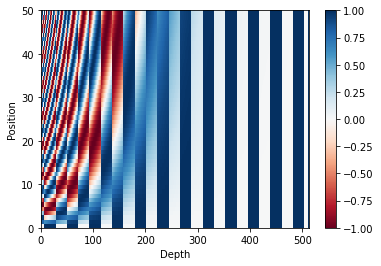

In [27]:
pos_encoding = positional_encoding(50, 512)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [28]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [29]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

In [30]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [31]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [32]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.

  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.

  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [33]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print ('Attention weights are:')
  print (temp_attn)
  print ('Output is:')
  print (temp_out)

In [34]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)

# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [35]:
# This query aligns with a repeated key (third and fourth), 
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [36]:
# This query aligns equally with the first and second key, 
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


In [37]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [38]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention, 
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [39]:
temp_mha = MultiHeadAttention(d_model=512, num_heads=8)
y = tf.random.uniform((1, 60, 512))  # (batch_size, encoder_sequence, d_model)
out, attn = temp_mha(y, k=y, q=y, mask=None)
out.shape, attn.shape

(TensorShape([1, 60, 512]), TensorShape([1, 8, 60, 60]))

In [40]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [41]:
sample_ffn = point_wise_feed_forward_network(512, 2048)
sample_ffn(tf.random.uniform((64, 50, 512))).shape

TensorShape([64, 50, 512])

In [42]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [43]:
sample_encoder_layer = EncoderLayer(512, 8, 2048)

sample_encoder_layer_output = sample_encoder_layer(
    tf.random.uniform((64, 43, 512)), False, None)

sample_encoder_layer_output.shape  # (batch_size, input_seq_len, d_model)

TensorShape([64, 43, 512])

In [44]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)


  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):
    # enc_output.shape == (batch_size, input_seq_len, d_model)

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

    return out3, attn_weights_block1, attn_weights_block2

In [45]:
sample_decoder_layer = DecoderLayer(512, 8, 2048)

sample_decoder_layer_output, _, _ = sample_decoder_layer(
    tf.random.uniform((64, 50, 512)), sample_encoder_layer_output, 
    False, None, None)

sample_decoder_layer_output.shape  # (batch_size, target_seq_len, d_model)

TensorShape([64, 50, 512])

In [46]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, 
                                            self.d_model)


    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [47]:
sample_encoder = Encoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, input_vocab_size=8500,
                         maximum_position_encoding=10000)
temp_input = tf.random.uniform((64, 62), dtype=tf.int64, minval=0, maxval=200)

sample_encoder_output = sample_encoder(temp_input, training=False, mask=None)

print (sample_encoder_output.shape)  # (batch_size, input_seq_len, d_model)

(64, 62, 512)


In [48]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) 
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training, 
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [49]:
sample_decoder = Decoder(num_layers=2, d_model=512, num_heads=8, 
                         dff=2048, target_vocab_size=8000,
                         maximum_position_encoding=5000)
temp_input = tf.random.uniform((64, 26), dtype=tf.int64, minval=0, maxval=200)

output, attn = sample_decoder(temp_input, 
                              enc_output=sample_encoder_output, 
                              training=False,
                              look_ahead_mask=None, 
                              padding_mask=None)

output.shape, attn['decoder_layer2_block2'].shape

(TensorShape([64, 26, 512]), TensorShape([64, 8, 26, 62]))

In [50]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, 
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super(Transformer, self).__init__()

    self.encoder = Encoder(num_layers, d_model, num_heads, dff, 
                           input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff, 
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inp, tar, training, enc_padding_mask, 
           look_ahead_mask, dec_padding_mask):

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

    # dec_output.shape == (batch_size, tar_seq_len, d_model)
    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

    return final_output, attention_weights

In [51]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [52]:
from tensorflow.keras.optimizers import Adam

num_layers = 4
num_heads = 4
d_model = 256
dff = 512
dropout = 0.2
input_vocab_size = tokenizer.vocab_size + 2
target_vocab_size = tokenizer.vocab_size + 2
optimizer = Adam(CustomSchedule(d_model), beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [53]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

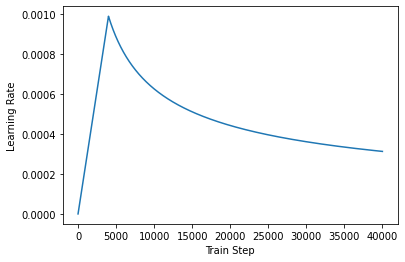

In [54]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [55]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [56]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [57]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [58]:
transformer = Transformer(num_layers, d_model, num_heads, dff,
                          input_vocab_size, target_vocab_size, 
                          pe_input=input_vocab_size, 
                          pe_target=target_vocab_size,
                          rate=dropout)



In [59]:
def create_masks(inp, tar):
  # Encoder padding mask
  enc_padding_mask = create_padding_mask(inp)

  # Used in the 2nd attention block in the decoder.
  # This padding mask is used to mask the encoder outputs.
  dec_padding_mask = create_padding_mask(inp)

  # Used in the 1st attention block in the decoder.
  # It is used to pad and mask future tokens in the input received by 
  # the decoder.
  look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
  dec_target_padding_mask = create_padding_mask(tar)
  combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

  return enc_padding_mask, combined_mask, dec_padding_mask

In [60]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

In [72]:
EPOCHS = 120

In [73]:
history = {'train loss': [], 'train acc': [], 'val loss': [], 'val acc': []}

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
val_loss = tf.keras.metrics.Mean(name='val_loss')
val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='val_accuracy')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]

@tf.function(input_signature=step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)    
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
  train_loss(loss)
  train_accuracy(tar_real, predictions)

@tf.function(input_signature=step_signature)
def val_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]
  
  enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)
  with tf.GradientTape() as tape:
    predictions, _ = transformer(inp, tar_inp, True, enc_padding_mask, combined_mask, dec_padding_mask)
    loss = loss_function(tar_real, predictions)

  val_loss(loss)
  val_accuracy(tar_real, predictions)

In [74]:
for epoch in range(EPOCHS):
  start = time.time()

  train_loss.reset_states()
  train_accuracy.reset_states()

  val_loss.reset_states()
  val_accuracy.reset_states()
  print(f'Starting Epoch {epoch+1}/{EPOCHS}')

  for (batch, (inp, tar)) in enumerate(train_dataset):
    train_step(inp, tar)

    if (batch + 1) % 50 == 0:
      print(f'  > Batch {batch+1}', end=' \t\t ')
      print(f'- train_loss: {train_loss.result():.4f} - train_acc: {train_accuracy.result():.4f}')      
  history['train loss'].append(train_loss.result())
  history['train acc'].append(train_accuracy.result())
  
  for (batch, (inp, tar)) in enumerate(val_dataset):
    val_step(inp, tar)  
  history['val loss'].append(val_loss.result())
  history['val acc'].append(val_accuracy.result())

  elapsed = time.time() - start
  print(f'Ending Epoch {epoch+1}/{EPOCHS}', end=' \t ')

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))

  print(f'- train_loss: {history["train loss"][-1]:.4f} - train_acc: {history["train acc"][-1]:.4f}', end=' ')
  print(f'- val_loss: {history["val loss"][-1]:.4f} - val_acc: {history["val acc"][-1]:.4f}')

  print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Starting Epoch 1/60
  > Batch 50 		 - train_loss: 0.1250 - train_acc: 0.8591
  > Batch 100 		 - train_loss: 0.1244 - train_acc: 0.8634
  > Batch 150 		 - train_loss: 0.1254 - train_acc: 0.8631
  > Batch 200 		 - train_loss: 0.1253 - train_acc: 0.8639
Ending Epoch 1/60 	 - train_loss: 0.1246 - train_acc: 0.8642 - val_loss: 0.3849 - val_acc: 0.8403
Time taken for 1 epoch: 42.01619911193848 secs

Starting Epoch 2/60
  > Batch 50 		 - train_loss: 0.1212 - train_acc: 0.8599
  > Batch 100 		 - train_loss: 0.1199 - train_acc: 0.8643
  > Batch 150 		 - train_loss: 0.1203 - train_acc: 0.8642
  > Batch 200 		 - train_loss: 0.1205 - train_acc: 0.8650
Ending Epoch 2/60 	 - train_loss: 0.1199 - train_acc: 0.8653 - val_loss: 0.3845 - val_acc: 0.8409
Time taken for 1 epoch: 33.484209060668945 secs

Starting Epoch 3/60
  > Batch 50 		 - train_loss: 0.1178 - train_acc: 0.8606
  > Batch 100 		 - train_loss: 0.1172 - train_acc: 0.8648
  > Batch 150 		 - train_loss: 0.1174 - train_acc: 0.8648
  > Batch 20

In [75]:
from tensorflow.nn import softmax

newline_token = tokenizer.encode('\n')[0]

def evaluate(inp_list, max_length=35, temperature_factor=1, verbose=False):
  # the input is the tokenized string obtained from the given input list
  input = tokenizer.encode('\n'.join(inp_list))

  # the encoder input is surrounded by a start and an end token
  encoder_input = tf.expand_dims([tokenizer.vocab_size] + input + [tokenizer.vocab_size + 1], 0)

  # the decoder input is the same sentence preceded by a start token
  decoder_input = tf.expand_dims([tokenizer.vocab_size] + input, 0)

  # the final output of the evaluation (initially, this is an empty list)
  output = []

  # we repeat the process to get the entire verse (until the end token or the newline token is predicted)
  for i in range(max_length):
    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, decoder_input)  
    logits, attention_weights = transformer(
        encoder_input, decoder_input, False,
        enc_padding_mask, combined_mask, dec_padding_mask
    )

    # we get the probabilities for the decoded token (the last one)
    probabilities = softmax(logits[0, -1, :tokenizer.vocab_size]).numpy()

    # we take a subset of possible tokens whose probability is at least 1/temperature_factor of the maximal one
    indices = np.arange(tokenizer.vocab_size)[probabilities >= probabilities.max() / temperature_factor]

    # we renormalize this subset using, again, a softmax activation
    probabilities = softmax(probabilities[probabilities >= probabilities.max() / temperature_factor]).numpy()
    
    # the id is randomly chosen among the indices according to the computed probabilities
    predicted_id = np.random.choice(indices, size=1, p=probabilities)[0]
    
    # if the token coincides with the nd token or the newline token, the generation is interrupted
    if predicted_id == newline_token or predicted_id >= tokenizer.vocab_size:
      break

    # otherwise the token is appended both to the new decoder input and to the final output
    decoder_input = tf.concat([decoder_input, [[predicted_id]]], axis=-1)
    output.append(predicted_id)

    if verbose:
      print(tokenizer.decode([predicted_id]), end='')

  return output, attention_weights

In [76]:
string = "-start-non vi dispiaccia se vi lece dirci-end-\n-start-sa la man destra giace alcuna foce-end-\n"

def generate(
    input_string=string, # first three tercets of the comedy
    max_iterations=400,
    temperature_factor=1.0
):
  # at the beginning, the generated string is the encoding of the input string (plus a newline character)
  generated_string = input_string

  for i in range(max_iterations):
    # the input list is made up of the last 'seq_length' verses (-1 for the last blank verse to be filled)
    input_list = generated_string.split('\n')[-seq_length-1:]

    # the generated verse is then decoded
    target, _ = evaluate(input_list)
    generated_verse = tokenizer.decode(target)

    generated_string += generated_verse + '\n'
  
  # we finally return the decoded (and unmarked) string, excluding the input provided by the user
  return generated_string[len(input_string):]

In [77]:
generated_canto = generate(temperature_factor=0.75)

In [78]:
generated_canto = re.sub(
  '-start-=end_terzine=-end-',
  '',
  generated_canto
)

generated_canto = re.sub(
  '-start-',
  "",
  generated_canto
)

generated_canto = re.sub(
  '-end-',
  "",
  generated_canto
)   

In [79]:
print(generated_canto)


onde noi amendue possiamo uscirci
sanza costrigner de li angeli neri
che vegnan desto fondo a dipartirci

rispuose adunque più che tu non speri
sappressa un sasso che da la cerchia
si move e varca tutt i vallon feri

salvo che tutt i coperchi e nessunchia
salimmo qua giusto e lui di catoro
che di qua dal mondo qua giù satcolchia

e vengiò in che si partio ditoro
di sangue e la prima cerchia superba
mili beatrice per quella ffeno

chè l vostro cielo i loro si cerba
quanto pesol per sì che non dimanda
fatto avesser mera a la marere superba

non è fandanzasi a la torna il monda
mal frutto tuo nel cielo e la fede
sì cha la sua virtù che conseconda

chè duna pianta damor con procede
lavidia speranza ha fior del rispuose
del ver conforta che tu parlare

vedi la provedenza che sì rade
non anima fu sospeccion fè non
di valse udir che la festo a la valse

la sua provedenza fa che con ciele
la virtù che chè per te si puote
poscia che già mavea qui si rade

nel mondo sù verso ancora io remote
ma

In [80]:
from metrics import eval

eval(generated_canto, divine_comedy)


rispuose adunque più che tu non speri
sappressa un sasso che da la cerchia
si move e varca tutt i vallon feri

salvo che tutt i coperchi e nessunchia

Hendecasyllabicness: 0.9090909090909092, Rhymeness: 1.0

salvo che tutt i coperchi e nessunchia
salimmo qua giusto e lui di catoro
che di qua dal mondo qua giù satcolchia

e vengiò in che si partio ditoro

Hendecasyllabicness: 0.9545454545454546, Rhymeness: 1.0

e vengiò in che si partio ditoro
di sangue e la prima cerchia superba
mili beatrice per quella ffeno

chè l vostro cielo i loro si cerba

Hendecasyllabicness: 1.0, Rhymeness: 1.0

chè l vostro cielo i loro si cerba
quanto pesol per sì che non dimanda
fatto avesser mera a la marere superba

non è fandanzasi a la torna il monda

Hendecasyllabicness: 0.8636363636363635, Rhymeness: 1.0

non è fandanzasi a la torna il monda
mal frutto tuo nel cielo e la fede
sì cha la sua virtù che conseconda

chè duna pianta damor con procede

Hendecasyllabicness: 0.9545454545454546, Rhymeness: 1.0


In [81]:
def ngrams_plagiarism(generated_text, original_text, n=4):
    # the tokenizer is used to remove non-alphanumeric symbols
    tokenizer = tfds.deprecated.text.Tokenizer()
    original_text = tokenizer.join(tokenizer.tokenize(original_text.lower()))
    generated_text_tokens = tokenizer.tokenize(generated_text.lower())
 
    total_ngrams = len(generated_text_tokens) - n + 1
    plagiarism_counter = 0
 
    for i in range(total_ngrams):
        ngram = tokenizer.join(generated_text_tokens[i:i+n])
        plagiarism_counter += 1 if ngram in original_text else 0
    return 1 - (plagiarism_counter / total_ngrams)
 
ngrams_plagiarism(generated_canto, divine_comedy)

0.9933237958989032